Building the Winning Team with KBO data

https://www.kaggle.com/rezameri/simple-eda-to-build-the-winning-team/notebook

The goal is to find the most influential element stats in baseball record and to check that which players are fitted for that.



Data

Regular_Season_Batter.csv  
(https://dacon.io/competitions/official/62540/data/)

(https://drive.google.com/file/d/116OV5ysXKG3dgJ9V79U_kISFy1-r8CUD/view?usp=sharing)

kbo_team_stat.csv

(http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=0&ys=2015&ye=2020&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=Year&o2=AB&de=1&lr=1&tr=&cv=&ml=1&sn=30&si=&cn=AVG,,0,RBI,,0)

(https://drive.google.com/file/d/18rEIWCdRoJS6_r8luZlvT2yN5Gzi3CQ9/view?usp=sharing


Library

In [ ]:
install.packages("dplyr")
install.packages("tidyverse")
install.packages("tidyr")
install.packages("broom")
install.packages("pillar")
install.packages("lubridate") 

In [ ]:
library(dplyr)
library(tidyverse)
library(tidyr)
library(broom)
library(lubridate)

Data Loading $ Structure

In [705]:
system("gdown --id 116OV5ysXKG3dgJ9V79U_kISFy1-r8CUD")
bat <- read.csv("Regular_Season_Batter.csv",header=T,fileEncoding = "euc-kr")

system("gdown --id 18rEIWCdRoJS6_r8luZlvT2yN5Gzi3CQ9")
team <- read.csv("kbo_team_stat.csv",header=T,fileEncoding = "euc-kr")

In [ ]:
head(bat)

In [ ]:
head(team)

In [ ]:
str(bat)

In [ ]:
str(team)

Variable(Terminology) Explanation

|Terminology|Explanation|
|---|------|
|PA.타석|타석에 선 타격 기회 횟수 |
|AB.타수|타석 - (볼넷+사구+희생타)|
|OB.출루|타석에 선 후 진루에 성공하는 것|
|BB.볼넷|볼 4개를 얻어 출루|
|HBP.사구|공을 몸에 맞아 출루|
|H.안타|타격에 성공해 출루|
|TB.루타|1루타x1 + 2루타x2 + 3루타x3 + 홈런x4|
|HR.홈런|공을 담장 밖으로 넘긴 타격|
|R.득점|출루 후 홈으로 돌아와 얻은 점수|
|RBI.타점|타격을 통해 주자들을 득점시켜 얻은 점수|
|SO.삼진|스트레이크 3개를 받아서 당한 아웃|
|SB.도루|루 상의 주자 단독으로 진루하는 것|
|AVG.타율|안타/타수|
|OBP.출루율|출루/타석|
|SLG.장타율|루타/타수|
|OPS|출루율+장타율|

데이터 전처리 - 변수 

In [706]:
colnames(bat)
colnames(team)

[1] "batter_id"       "batter_name"     "year"            "team"           
 [5] "avg"             "G"               "AB"              "R"              
 [9] "H"               "X2B"             "X3B"             "HR"             
[13] "TB"              "RBI"             "SB"              "CS"             
[17] "BB"              "HBP"             "SO"              "GDP"            
[21] "SLG"             "OBP"             "E"               "height.weight"  
[25] "year_born"       "position"        "career"          "starting_salary"
[29] "OPS"

[1] "이름" "연도" "타석" "타수" "득점" "안타" "X2타" "X3타" "홈런" "루타"
[11] "타점" "도루" "도실" "볼넷" "사구" "고4"  "삼진" "병살" "희타" "희비"
[21] "타율" "출루" "장타" "OPS"

In [707]:
# 변수 추가
age <- year(Sys.Date()) - year(as.Date(bat$year_born,'%Y년 %m월 %d일'))
bat <- cbind(bat,age)

G <- rep(144,60) 
team <- cbind(team,G)

In [708]:
# 변수 제거
bat <- select(bat, -c(GDP,height.weight,year_born,career,starting_salary))

team <- select(team, -c(고4,희타,희비,병살))

In [709]:
# 변수명 변경
bat <- rename(bat,AVG=avg) 
team <- rename(team,team_name=이름,year=연도,PA=타석,AB=타수,R=득점,H=안타,X2B=X2타,X3B=X3타,HR=홈런,TB=루타,RBI=타점,SB=도루,CS=도실,BB=볼넷,HBP=사구,SO=삼진,AVG=타율,OBP=출루,SLG=장타)

In [710]:
colnames(bat)
colnames(team)

[1] "batter_id"   "batter_name" "year"        "team"        "AVG"        
 [6] "G"           "AB"          "R"           "H"           "X2B"        
[11] "X3B"         "HR"          "TB"          "RBI"         "SB"         
[16] "CS"          "BB"          "HBP"         "SO"          "SLG"        
[21] "OBP"         "E"           "position"    "OPS"         "age"

[1] "team_name" "year"      "PA"        "AB"        "R"         "H"        
 [7] "X2B"       "X3B"       "HR"        "TB"        "RBI"       "SB"       
[13] "CS"        "BB"        "HBP"       "SO"        "AVG"       "OBP"      
[19] "SLG"       "OPS"       "G"

데이터 전처리 - 결측치 처리 / 30타수 이하 제거

In [711]:
 # 결측치가 있는 열 
 colSums(is.na(bat))  
 colSums(is.na(team)) 

batter_id batter_name        year        team         AVG           G 
          0           0           0           0          26           0 
         AB           R           H         X2B         X3B          HR 
          0           0           0           0           0           0 
         TB         RBI          SB          CS          BB         HBP 
          0           0           0           0           0           0 
         SO         SLG         OBP           E    position         OPS 
          0          26          24           0           0          26 
        age 
          0

team_name      year        PA        AB         R         H       X2B       X3B 
        0         0         0         0         0         0         0         0 
       HR        TB       RBI        SB        CS        BB       HBP        SO 
        0         0         0         0         0         0         0         0 
      AVG       OBP       SLG       OPS         G 
        0         0         0         0         0

In [ ]:
# 결측치 리스트
bat %>% filter(complete.cases(bat)=="FALSE") %>% select(batter_name, year, SLG, OBP, OPS)

In [ ]:
# 1. 결측치 가진 타자들의 경기수, 타수
bat %>% filter(complete.cases(bat)=="FALSE") %>% select(batter_name, year, G, AB)

In [ ]:
# 2. 매우 높은 타율(0.400이상)을 가진 선수들의 경기수 , 타수
bat %>% filter(AVG>0.400) %>% select(AVG, batter_name, year, G, AB)

In [715]:
# 타수가 낮은 선수들에게서 결측값과 극단적인 비율 기록이 나타나므로, 35타수 이하 선수들의 항목을 제거한다.
bat <- bat %>% filter(AB>35)

In [ ]:
sum(is.na(bat))

team 데이터로 득점에 유의한 변수 찾기

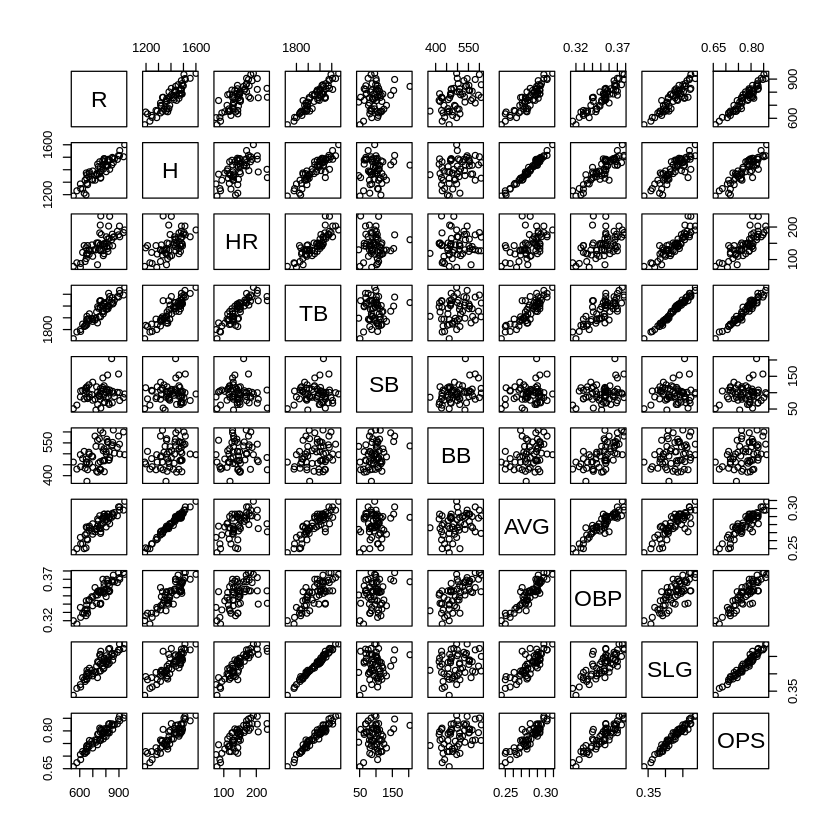

In [563]:
# Scatterplot for team data
plot(team[,c("R","H","HR","TB","SB","BB","AVG","OBP","SLG","OPS")])

In [ ]:
# (Scatterplot & Correlation Coefficient) of H and R 
team %>% mutate(H_per_G = H / G, R_per_G = R / G) %>%
  ggplot(aes(H_per_G, R_per_G)) + 
  geom_point(alpha = 0.5)

cor(team$H,team$R)

In [ ]:
# (Scatterplot & Correlation Coefficient) of HR and R 
team %>% mutate(HR_per_G = H / G, R_per_G = R / G) %>%
  ggplot(aes(HR_per_G, R_per_G)) + 
  geom_point(alpha = 0.5)

cor(team$HR,team$R)

In [ ]:
# (Scatterplot & Correlation Coefficient) of BB and R 
team %>% mutate(BB_per_G = BB / G, R_per_G = R / G) %>%
  ggplot(aes(BB_per_G, R_per_G)) + 
  geom_point(alpha = 0.5)

cor(team$BB,team$R)

In [ ]:
# (Scatterplot & Correlation Coefficient) of TB and R 
team %>% mutate(TB_per_G = TB / G, R_per_G = R / G) %>%
  ggplot(aes(TB_per_G, R_per_G)) + 
  geom_point(alpha = 0.5)

cor(team$TB,team$R)

In [ ]:
# (Scatterplot & Correlation Coefficient) of AVG and R 
team %>% ggplot(aes(AVG, R)) + 
  geom_point(alpha = 0.5)

cor(team$AVG,team$R)

In [ ]:
# (Scatterplot & Correlation Coefficient) of OBP and R 
team %>% ggplot(aes(OBP, R)) + 
  geom_point(alpha = 0.5)

cor(team$OBP,team$R)

In [ ]:
# (Scatterplot & Correlation Coefficient) of OPS and R 
team %>% ggplot(aes(OPS, R)) + 
  geom_point(alpha = 0.5)

cor(team$OPS,team$R)

회귀식

In [726]:
# regression with TB, OBP, OPS
fit <- team %>% 
  select(R,TB,OBP,OPS) %>%  
  lm(R ~ TB + OBP + OPS, data = .)

In [ ]:
 tidy(fit)

In [ ]:
 glance(fit)

In [ ]:
# predict number of R for each team in 2020
team %>% filter(year %in% 2020) %>% 
  mutate(R = R,
        TB = TB,
        OBP = OBP,
        OPS = OPS) %>% 
  mutate(R_hat = predict(fit, newdata = .)) %>%
  ggplot(aes(R_hat, R, label = team_name)) + 
  geom_point() +
  geom_text(nudge_x = 0.05, hjust = 0) +
  geom_abline()

선수 데이터에 득점 회귀식 접합

In [783]:
 # 기대득점
 player <- bat %>%
 mutate(R = R,
        TB = TB,
        OBP = OBP,
        OPS = OPS) %>% 
 mutate(R_hat = predict(fit, newdata = .))  %>%
 group_by(batter_name) %>%
 summarise(R_hat = mean(R_hat)) %>%
 arrange(desc(R_hat)) 

player[1:10,]

batter_name,R_hat
<chr>,<dbl>
이정후,159.9102
김태균,146.6998
박민우,142.8668
테임즈,139.3066
김현수,123.5572
박준태,122.2668
서건창,116.7360
김동주,113.5210
나바로,108.1480
